In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
import pydotplus

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv",header=None)

In [4]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [5]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [6]:
train.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


In [7]:
clf = DT()

In [8]:
parameters = {"max_depth": list(range(2,11))}

In [9]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [10]:
train.shape

(27128, 18)

In [11]:
trainX = train.iloc[:,0:17]
y = train["y"]

In [12]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [13]:
trainX = pd.get_dummies(trainX)

In [14]:
gcv = GridSearchCV(clf, parameters,cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [15]:
gcv.cv_results_

{'mean_fit_time': array([0.13114295, 0.13892231, 0.14793272, 0.18457184, 0.20260963,
        0.21920004, 0.25102701, 0.26591167, 0.27042499]),
 'std_fit_time': array([0.00389202, 0.02146266, 0.00642304, 0.0061404 , 0.00509469,
        0.00883516, 0.00301835, 0.00522762, 0.01042215]),
 'mean_score_time': array([0.01089125, 0.01416688, 0.01141577, 0.00981712, 0.0116498 ,
        0.00895119, 0.00873618, 0.00873814, 0.00603986]),
 'std_score_time': array([0.00111266, 0.00544602, 0.00133573, 0.00181534, 0.00256553,
        0.0003709 , 0.00053965, 0.00095895, 0.0008549 ]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [16]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [17]:
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85726064, 0.86924573,
       0.88597987, 0.89893066, 0.91025715, 0.92425665])

In [18]:
test_score

array([0.74715097, 0.80745683, 0.81411275, 0.82270395, 0.82733411,
       0.82503169, 0.82009821, 0.79235925, 0.77842244])

([<matplotlib.axis.XTick at 0x7fce4800aa60>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

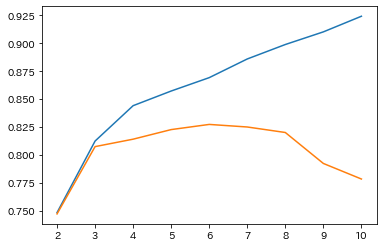

In [31]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0,9)),list(range(2,11))) #グラフは0から表示されるがDepth=2~11にしたいので変更

In [20]:
gcv.best_params_

{'max_depth': 6}

In [21]:
pred = gcv.predict_proba(trainX)

In [22]:
pred

array([[0.4368071 , 0.5631929 ],
       [0.98031963, 0.01968037],
       [0.55778894, 0.44221106],
       ...,
       [0.95206612, 0.04793388],
       [0.98031963, 0.01968037],
       [0.98031963, 0.01968037]])

In [23]:
pred = pred[:,1]

In [24]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print("AUC=", metrics.auc(fpr, tpr))

AUC= 0.8720092396164274


## 決定技モデルのdepthとmin_samples_leafでグリッドサーチ

In [32]:
clf2 = DT()

In [33]:
parameters2 = {"max_depth": list(range(2,11)),"min_samples_leaf": [5,10,20,50,100,500]}

In [34]:
gcv2 = GridSearchCV(clf2,parameters2,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [35]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [36]:
pred2 = gcv2.predict_proba(trainX)

In [37]:
pred2 = pred2[:,1]

In [38]:
fpr2, tpr2, thresholds = metrics.roc_curve(y, pred2)
print("AUC=", metrics.auc(fpr2, tpr2))

AUC= 0.9084539475709035
